# Group S

## Group Members

## 1. Safial Islam Ayon 
## 2. Md Shohel Mojumder
## 3. Arber Aga
## 4. Imtiaz Ahmed 

# Exercise 1.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [23]:
'''Step size'''
d_t = 0.01 

'''Time interval'''
d_t_out = 0.05 

'''Time range [0, 200]'''
N = int(200/d_t) + 1 

'''Cycles'''
cycle = 4001

'''Data are given in Page 3, Example 1.1'''
s = 10
r = 28
b = 8/3
z_0 = np.array([-0.587, -0.563, 16.870])
        
a = 1/np.sqrt(d_t)

'''nonautonomous forcing term (g), which differences between the surrogate physical process 
and the imperfect model. [using equation 1.6 in page 3]'''

g_0 = np.array([a * (1/np.sqrt(2) - 0.5), 
                a * (1/np.sqrt(3) - 0.5), 
                a * (1/np.sqrt(5) - 0.5)])


### Calculating variable z
#### Using equation 1.4 in page 3

In [24]:
def calculate_f(z):
    return np.array([s * (z[1] - z[0]),
                     z[0] * (r - z[2]) - z[1],
                     z[0] * z[1] - b * z[2]])

### Calculating g(n)
#### Using equation 1.27 in page 30

In [25]:
def calculate_g(g_n):
    g_n_plus_1 = []
    for g in g_n:
        if -a/2 <= g < 0:
            val = 1.99999 * g + a/2
        else:
            val = -1.99999 * g + a/2
        g_n_plus_1.append(val)
    
    return np.array(g_n_plus_1)

### Calculating numerical approximation (Forward Euler)
#### Using equation 1.2 in Page 2

In [26]:
def calculate_z():
    data = np.zeros([cycle, 3])
    z = z_0
    g = g_0
    
    index = 0
    step = int(d_t_out/d_t)
    
    '''store only the observed states'''
    for i in range(N):
        if i % step == 0: 
            data[index:] = z
            index += 1
            
        z = z + d_t * (calculate_f(z) + g)
        g = calculate_g(g)
    
    return data.T

In [27]:
trajectory = calculate_z()
print("Reference Trajectory:\n", trajectory)
print("\nShape:", trajectory.shape)

'''store the resulting reference trajectory in the csv file for later use'''
np.savetxt('exercise_1.csv', trajectory, delimiter=',')

Reference Trajectory:
 [[-0.587      -0.70622837 -1.42011982 ... 11.91280974 11.91280974
  11.91280974]
 [-0.563      -1.21147141 -2.638556   ... 20.16544964 20.16544964
  20.16544964]
 [16.87       13.00847125  9.98839166 ... 19.384856   19.384856
  19.384856  ]]

Shape: (3, 4001)


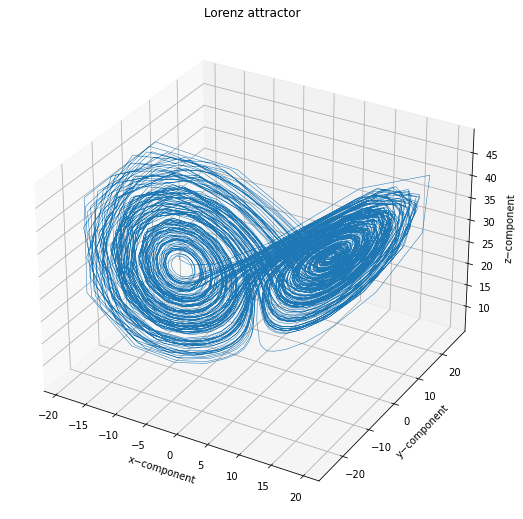

In [7]:
plt.figure(figsize=(9,9))
ax = plt.axes(projection="3d")
ax.plot(trajectory[0,:], trajectory[1,:], trajectory[2,:], lw=0.5)
ax.set_title("Lorenz attractor")
ax.set_xlabel("x−component")
ax.set_ylabel("y−component")
ax.set_zlabel("z−component")
plt.show()

# Exercise 2.

In [8]:
data = np.genfromtxt('exercise_1.csv', delimiter=',')

In [9]:
'''Example 1.2 in page 5'''
a = 4 
xi_0 = a * (1/np.sqrt(2) - 0.5)
N = data.shape[1] * 20
N_xi = data.shape[1] * 20

In [10]:
'''linear forward operator [Example 1.2 in page 5]'''

def get_x_ref():
    return data[0][1:]

In [11]:
'''modified tent map to model measurement errors'''

def calculate_xi():
    data_xi = np.zeros(N_xi)
    xi = xi_0
    index = 0
    
    '''store every tenth iterate in the array equation 1.10 in page 5'''
    for i in range(N):
        if i % 10 == 0:
            data_xi[index] = xi
            index = index + 1
            
        '''Using equation 1.28 in page 30'''
        if -a / 2 <= xi < 0:
            xi = 1.99999 * xi + a / 2
        else:
            xi = -1.99999 * xi + a / 2
        
    '''average of first 20 errors [Example 1.2 in page 5]'''
    data_xi = data_xi.reshape(data.shape[1], 20)
    data_xi = np.mean(data_xi, axis=1)
    return data_xi[1:]

In [12]:
'''observation x_obs at time delta_t_out = 0.05 [Example 1.2 in page 5]'''
'''x_obs = x_ref + error'''

def get_x_obs():
    error = calculate_xi()
    return  get_x_ref() + error, error

In [13]:
x_ref = get_x_ref()
x_obs, errors = get_x_obs()

print("The values of x_ref:", x_ref, "\n")
print("The values of x_obs:", x_obs, "\n")
print("The values of Errors:", errors, "\n")
print("Shape of x_obs:", x_obs.shape)

# Store the numerically generated observation values x_obs
np.savetxt('exercise_2.csv', x_obs, delimiter=',')

The values of x_ref: [-0.57066544 -0.70622837 -1.03130207 ...  5.46020265  8.18371572
 11.91280974] 

The values of x_obs: [-0.16861821 -0.62966159 -1.17230382 ...  5.46020265  8.18371572
 11.91280974] 

The values of Errors: [ 0.40204724  0.07656678 -0.14100175 ...  0.          0.
  0.        ] 

Shape of x_obs: (4000,)


#### Observed values for the x-component and their measurement errors over the time interval [0, 10] with observations taken every delta_t_out = 0.05 time units [Figure 1.3 in page 6]. Both the cases numerical results are displayed for the first 200 data points.

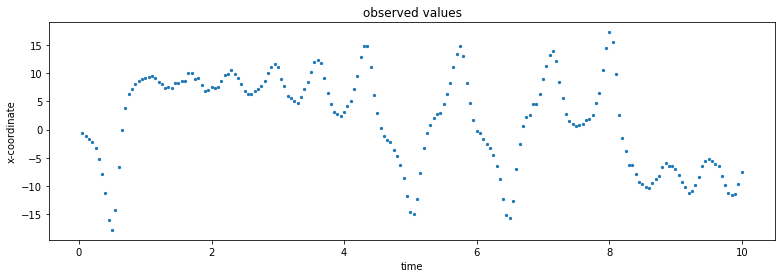

In [14]:
time = np.linspace(0, 200, 4001)
fig = plt.figure(figsize=(13,4))

plt.scatter(time[1:201], x_obs[1:201], s=5)
plt.title("observed values")
plt.ylabel("x-coordinate")
plt.xlabel("time")

plt.show()

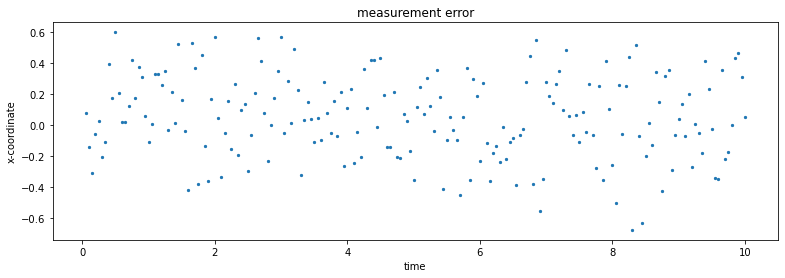

In [15]:
time = np.linspace(0, 200, 4001)
fig = plt.figure(figsize=(13, 4))

plt.scatter(time[1:201], errors[1:201], s=5)
plt.title("measurement error")
plt.ylabel("x-coordinate")
plt.xlabel("time")

plt.show()

# Exercise 3.

In [16]:
y_obs = np.genfromtxt('exercise_2.csv', delimiter=',')
N = len(y_obs)

In [17]:
'''When Δtout = 0.05 we calculate the y_predict(t_k) using euqtion 1.12 in page 7'''

def y_predict_05(y_obs_k, y_obs_k_1):
    return 2 * y_obs_k - y_obs_k_1
 
    
'''When 3Δtout = 0.15 we calculate the y_predict(t_k) using euqtion used in example 1.14
    in page 8'''

def y_predict_15(y_obs_k, y_obs_k_1):
    return 4 * y_obs_k - 3 * y_obs_k_1


'''Calculate y_predict(t_[k+1] when Δtout = 0.05)'''

def calc_y_predict_05():
    y_pred = np.zeros(N)
    '''skip the first 2 values according to the equation'''
    y_pred[:2] = np.NaN 
        
    for i in range(2, N):
        y_pred[i] = y_predict_05(y_obs[i-1], y_obs[i-2])
    
    return y_pred
 
    
'''Calculate y_predict(t_[k+3] when 3Δtout = 0.15)'''

def calc_y_predict_15():
    y_pred = np.zeros(N)
    '''skip the first 4 values according to the equation'''
    y_pred[:4] = np.NaN 
    
    for i in range(4, N):
        y_pred[i] = y_predict_15(y_obs[i-3], y_obs[i-4])
        
    return y_pred

In [18]:
y_predict_05 = calc_y_predict_05()
y_predict_15 = calc_y_predict_15()

print("The values of Y predict when Δtout = 0.05: ", y_predict_05)
print("The values of Y predict when Δtout = 0.15: ", y_predict_15)

The values of Y predict when Δtout = 0.05:  [        nan         nan -1.09070498 ...  4.85261261  7.2566665
 10.9072288 ]
The values of Y predict when Δtout = 0.15:  [       nan        nan        nan ... 3.07726159 4.72384569 7.23036024]


In [19]:
'''Calculating Root mean square error (RMSE) when Δtout = 0.05 using equation 1.13 in page 7'''
rmse_05 = np.sqrt(1/(4000-2) * np.nansum((y_obs - y_predict_05)**2))
print("Time averaged RMSE when Δtout = 0.05 is", rmse_05)

'''Calculating Root mean square error (RMSE) when Δtout = 0.15 using equation 1.13 in page 7'''
rmse_15 = np.sqrt(1/(4000-4) * np.nansum((y_obs - y_predict_15)**2))
print("Time averaged RMSE when Δtout = 0.15 is", rmse_15)

Time averaged RMSE when Δtout = 0.05 is 1.2145443744861832
Time averaged RMSE when Δtout = 0.15 is 5.982138443725693


#### Observed values for the x-component and its predicted values using linear extrapolation. First figure shows the results from linear extrapolation over a single observation interval Δtout = 0.05, while the second figure shows results when triple the prediction interval to 0.15 time units [Figure 1.4 in page 9].

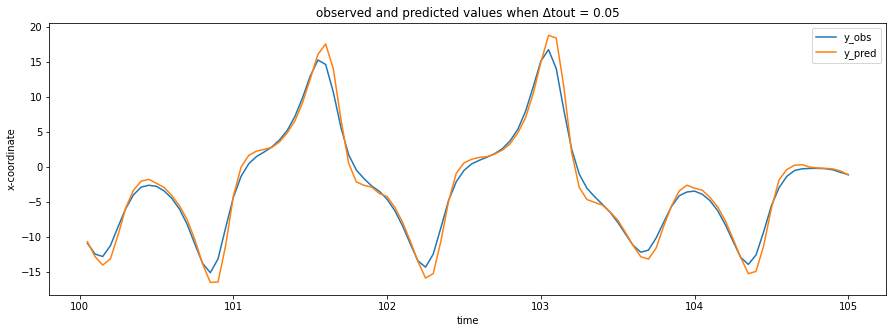

In [20]:
time = np.linspace(0.05, 200, 4000)
fig = plt.figure(figsize=(15,5))

plt.plot(time[2000:2100], y_obs[2000:2100], label="y_obs")
plt.plot(time[2000:2100], y_predict_05[2000:2100], label="y_pred")
plt.title("observed and predicted values when Δtout = 0.05")
plt.ylabel("x-coordinate")
plt.xlabel("time")
plt.legend()
plt.show()

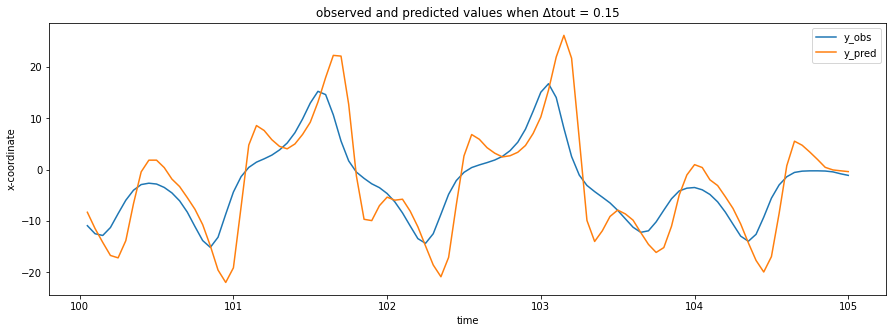

In [21]:
time = np.linspace(0.05, 200, 4000)
fig = plt.figure(figsize=(15,5))

plt.plot(time[2000:2100], y_obs[2000:2100], label="y_obs")
plt.plot(time[2000:2100], y_predict_15[2000:2100], label="y_pred")
plt.title("observed and predicted values when Δtout = 0.15")
plt.ylabel("x-coordinate")
plt.xlabel("time")
plt.legend()
plt.show()


Observing both the figures we can easily said that, the quality of the predictions is clearly worse in the larger window (Δtout = 0.15) compare to small window (Δtout = 0.05). The time averaged RMSE is 1.3602231773812092 when Δtout = 0.05 and 6.100097319155059 when Δtout = 0.15. 